# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('../diabetes.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Periksa Ringkasan Statistik

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Periksa Nilai Unik di Kolom Tertentu (Outcome)

In [5]:
cols = ['Outcome']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Outcome has [1 0] values



# Validasi Data

# Cek Missing Values di Setiap Kolom

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cek Data Duplikat

In [7]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Membagi Dataset Berdasarkan Tipe Data

In [8]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

# Data Numerik

In [9]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head())

Kolom Numerik:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Dataset Numerik:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# Data Kategorikal

In [10]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_categorical.head())


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
   Outcome
0        1
1        0
2        1
3        0
4        1


# Data Sebelum Normalisasi

In [11]:
# Menampilkan 5 baris pertama sebelum normalisasi
print("Data Sebelum Normalisasi:")
df_original = df.copy()  # Simpan hasil normalisasi ke dataframe baru
print(df_original.head())


Data Sebelum Normalisasi:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Normalisasi dengan Metode Min-Max Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler Min-Max
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur numerik
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Menyimpan hasil normalisasi ke file CSV
df.to_csv('diabetes_normalized.csv', index=False)


# Data Sesudah Normalisasi

In [13]:
# Menampilkan 5 baris pertama setelah normalisasi
print("Data Sesudah Normalisasi:")
df_normalized = df.copy()  # Simpan hasil normalisasi ke dataframe baru
print(df_normalized.head())


Data Sesudah Normalisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


# Feature Selection - Decision Trees

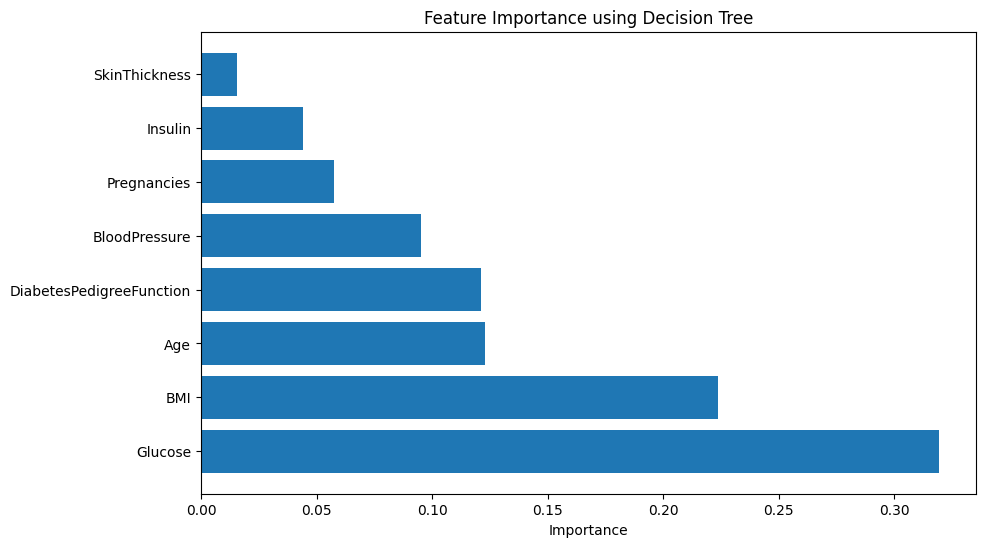


                     Feature  Importance
1                   Glucose    0.319435
5                       BMI    0.223649
7                       Age    0.122801
6  DiabetesPedigreeFunction    0.121196
2             BloodPressure    0.095297
0               Pregnancies    0.057756
4                   Insulin    0.044110
3             SkinThickness    0.015756


In [14]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Menyiapkan data fitur dan target
X = df[numerical_features]  # Fitur numerik
y = df['Outcome']  # Target: Outcome

# Melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Mengambil pentingnya fitur
feature_importances = model.feature_importances_

# Menampilkan pentingnya fitur
feature_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan pentingnya fitur
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Decision Tree')
plt.show()

# Menampilkan fitur yang paling penting
print("\n", feature_df)


# Feature Selection - Random Forest

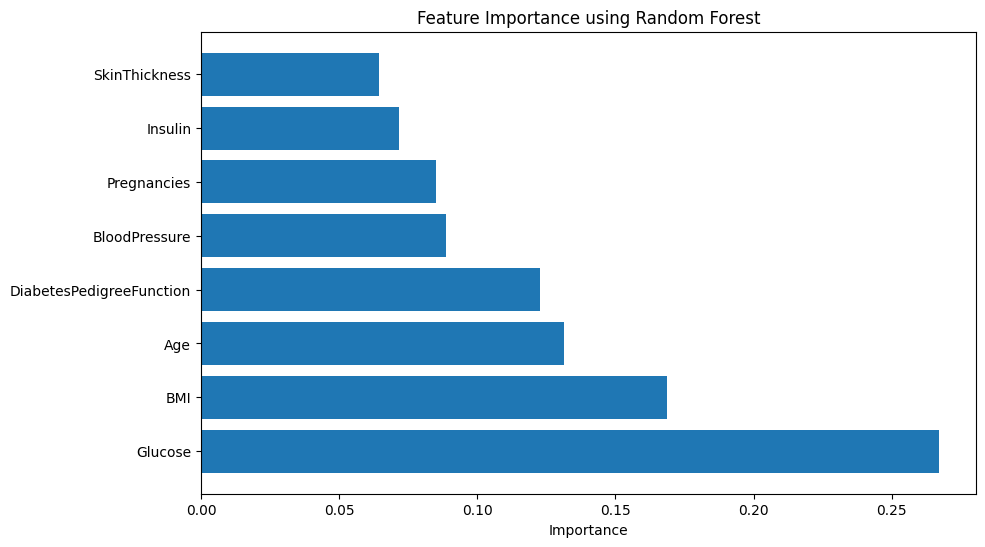


                     Feature  Importance
1                   Glucose    0.267142
5                       BMI    0.168769
7                       Age    0.131567
6  DiabetesPedigreeFunction    0.122695
2             BloodPressure    0.088660
0               Pregnancies    0.085017
4                   Insulin    0.071547
3             SkinThickness    0.064604


In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Menyiapkan data fitur dan target
X = df[numerical_features]  # Fitur numerik
y = df['Outcome']  # Target: Outcome

# Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Mengambil pentingnya fitur
feature_importances_rf = rf_model.feature_importances_

# Menampilkan pentingnya fitur
feature_df_rf = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances_rf
})

# Mengurutkan berdasarkan pentingnya fitur
feature_df_rf = feature_df_rf.sort_values(by='Importance', ascending=False)

# Visualisasi pentingnya fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_df_rf['Feature'], feature_df_rf['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

# Menampilkan fitur yang paling penting
print("\n", feature_df_rf)


# Pilih dan Eksekusi Feature Selection

In [16]:
# Menghapus fitur yang tidak diinginkan
df = df.drop(columns=[])

# Menampilkan dataset setelah penghapusan fitur
print(df.head())

# Menyimpan hasil seleksi fitur ke file CSV
df.to_csv('diabetes_feature_selected.csv', index=False)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


# Membagi Dataset Menjadi Data Training dan Data Testing

In [17]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi fitur (X) dan target (y)
X = df.drop(columns=['Outcome'])  # Fitur
y = df['Outcome']  # Target

# Membagi dataset menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan X_train dan y_train menjadi dataset training
train_df = X_train.copy()
train_df['Outcome'] = y_train

# Menggabungkan X_test dan y_test menjadi dataset testing
test_df = X_test.copy()
test_df['Outcome'] = y_test

# Menyimpan dataset training dan testing ke file CSV
train_df.to_csv('diabetes_train.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)


# Data Training

In [18]:
# Menampilkan 5 baris pertama dari dataset training
print("Data Training:")
print(train_df.head())


Data Training:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60      0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
618     0.529412  0.562814       0.672131       0.242424  0.000000  0.420268   
346     0.058824  0.698492       0.377049       0.191919  0.098109  0.427720   
294     0.000000  0.809045       0.409836       0.000000  0.000000  0.326379   
231     0.352941  0.673367       0.655738       0.373737  0.437352  0.688525   

     DiabetesPedigreeFunction       Age  Outcome  
60                   0.096499  0.000000        0  
618                  0.514091  0.483333        1  
346                  0.245944  0.016667        0  
294                  0.075149  0.733333        0  
231                  0.068318  0.416667        1  


# Data Testing

In [19]:
# Menampilkan 5 baris pertama dari dataset testing
print("Data Testing:")
print(test_df.head())


Data Testing:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
668     0.352941  0.492462       0.475410       0.333333  0.224586  0.506706   
324     0.117647  0.562814       0.614754       0.323232  0.000000  0.532042   
624     0.117647  0.542714       0.524590       0.000000  0.000000  0.459016   
690     0.470588  0.537688       0.655738       0.000000  0.000000  0.366617   
473     0.411765  0.683417       0.737705       0.000000  0.000000  0.445604   

     DiabetesPedigreeFunction       Age  Outcome  
668                  0.150299  0.366667        0  
324                  0.029889  0.000000        0  
624                  0.034159  0.000000        0  
690                  0.332195  0.216667        0  
473                  0.056362  0.483333        0  


# Latih Model KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Menyusun k_values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Latih model KNN untuk setiap nilai k dan simpan hasilnya
knn_models = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models[k] = knn

# Simpan model-model KNN dalam dictionary knn_models
print("Model KNN berhasil dilatih dengan berbagai nilai k.")


Model KNN berhasil dilatih dengan berbagai nilai k.


# Classification Report

In [21]:
# Menampilkan classification report untuk setiap model KNN
for k, model in knn_models.items():
    print(f"\nClassification Report untuk k = {k}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))



Classification Report untuk k = 1:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        99
           1       0.54      0.55      0.54        55

    accuracy                           0.67       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.67      0.67       154


Classification Report untuk k = 3:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154


Classification Report untuk k = 5:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0

# Visualisasi Akurasi Setiap Nilai K

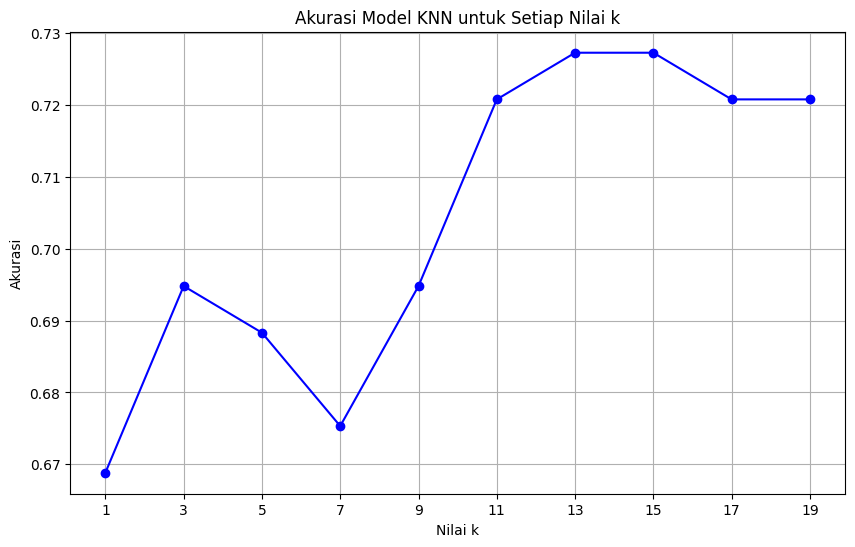


Akurasi untuk setiap nilai k:
k = 1: Akurasi = 0.6688
k = 3: Akurasi = 0.6948
k = 5: Akurasi = 0.6883
k = 7: Akurasi = 0.6753
k = 9: Akurasi = 0.6948
k = 11: Akurasi = 0.7208
k = 13: Akurasi = 0.7273
k = 15: Akurasi = 0.7273
k = 17: Akurasi = 0.7208
k = 19: Akurasi = 0.7208


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk setiap model KNN
accuracies = []
for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Membuat plot akurasi terhadap nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Akurasi Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Menampilkan list akurasi untuk setiap nilai k
print("\nAkurasi untuk setiap nilai k:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Akurasi = {accuracy:.4f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

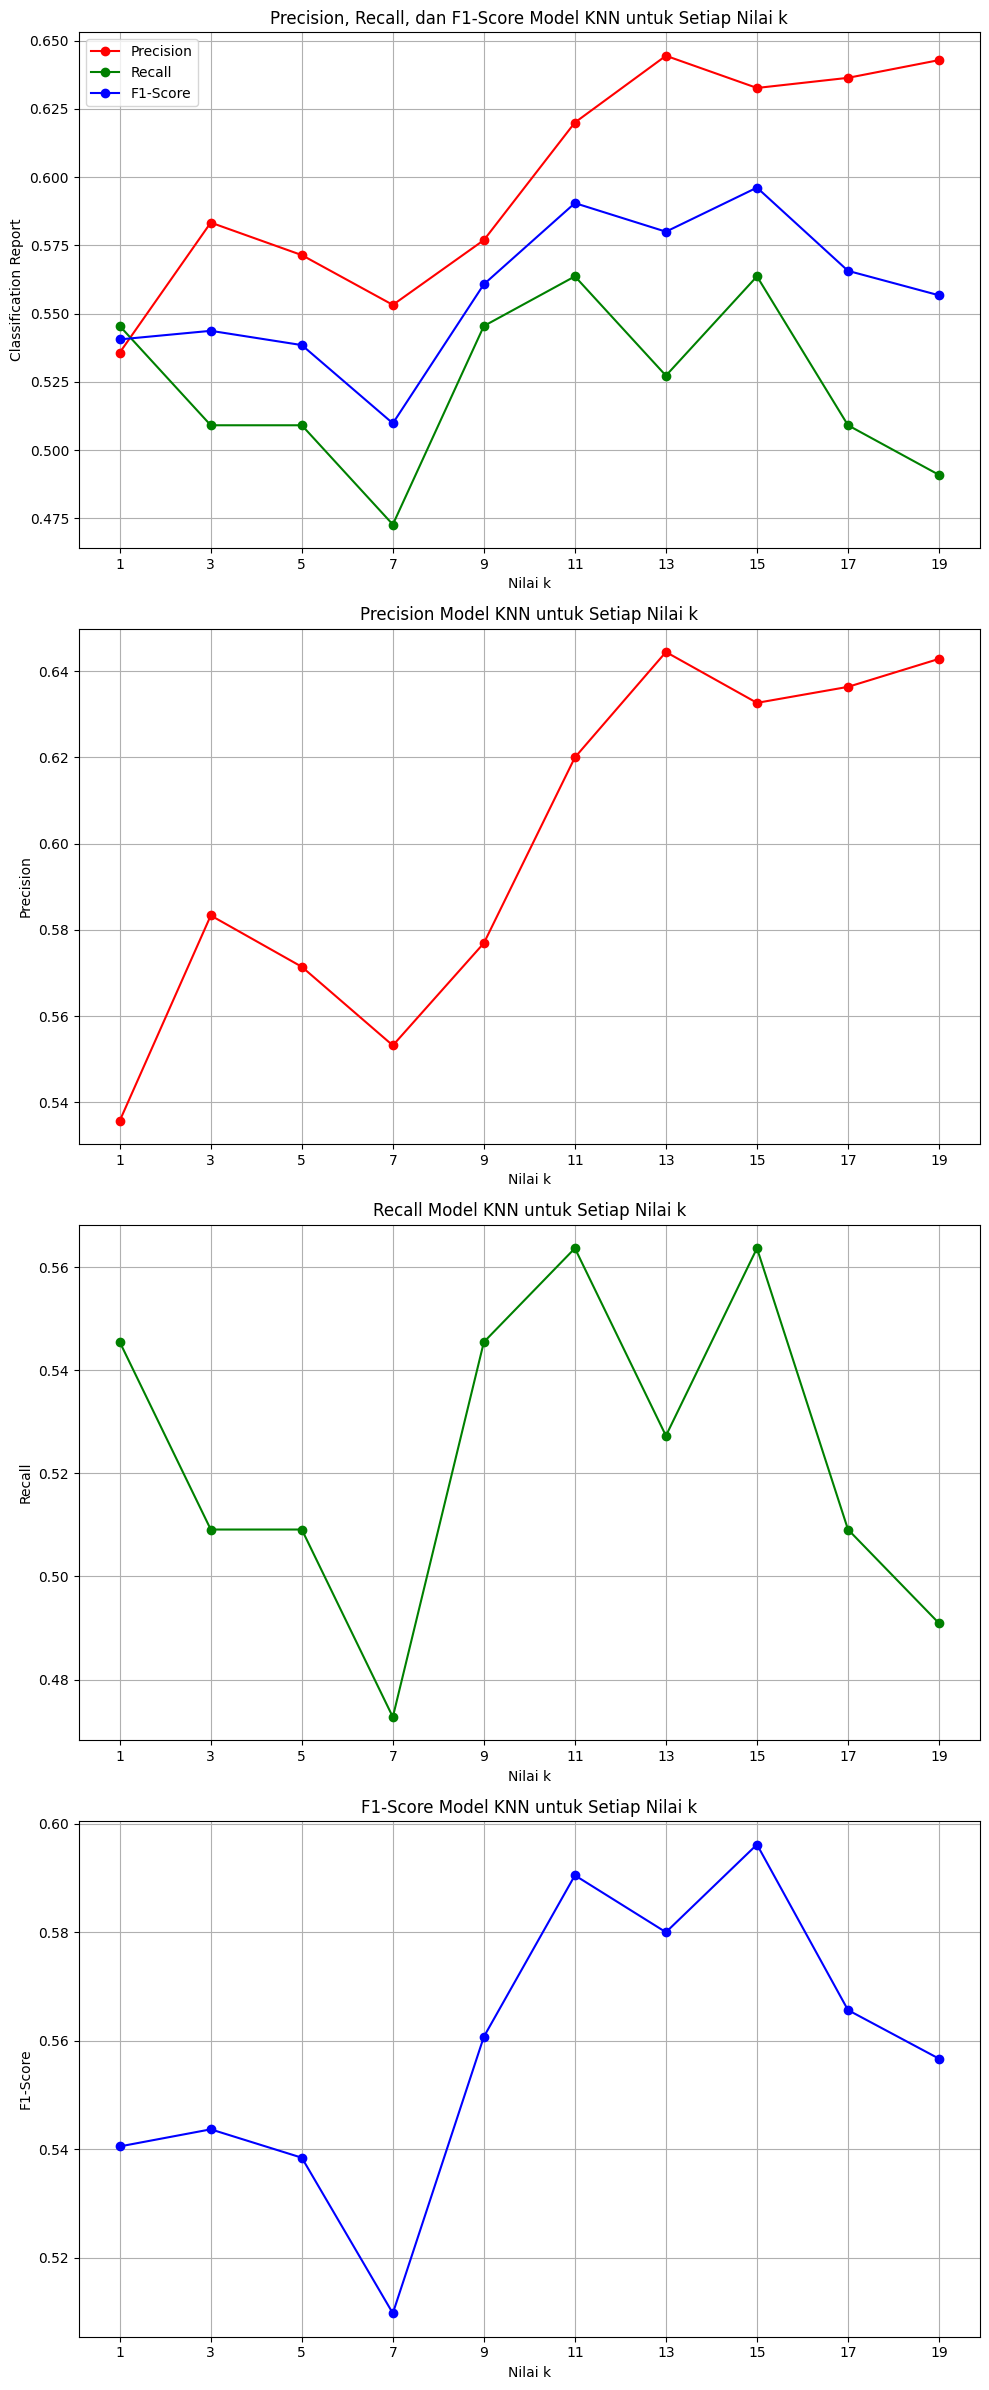


Precision, Recall, dan F1-Score untuk setiap nilai k:
k = 1: Precision = 0.5357, Recall = 0.5455, F1-Score = 0.5405
k = 3: Precision = 0.5833, Recall = 0.5091, F1-Score = 0.5437
k = 5: Precision = 0.5714, Recall = 0.5091, F1-Score = 0.5385
k = 7: Precision = 0.5532, Recall = 0.4727, F1-Score = 0.5098
k = 9: Precision = 0.5769, Recall = 0.5455, F1-Score = 0.5607
k = 11: Precision = 0.6200, Recall = 0.5636, F1-Score = 0.5905
k = 13: Precision = 0.6444, Recall = 0.5273, F1-Score = 0.5800
k = 15: Precision = 0.6327, Recall = 0.5636, F1-Score = 0.5962
k = 17: Precision = 0.6364, Recall = 0.5091, F1-Score = 0.5657
k = 19: Precision = 0.6429, Recall = 0.4909, F1-Score = 0.5567


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Menyimpan metrik precision, recall, dan f1-score untuk setiap model KNN
precisions = []
recalls = []
f1_scores = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Membuat subplots untuk menampilkan precision, recall, f1-score dan gabungannya
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

# Precision, Recall, F1-Score plot (gabungan dalam satu grafik) di posisi pertama
axes[0].plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
axes[0].plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
axes[0].plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label='F1-Score')
axes[0].set_title('Precision, Recall, dan F1-Score Model KNN untuk Setiap Nilai k')
axes[0].set_xlabel('Nilai k')
axes[0].set_ylabel('Classification Report')
axes[0].set_xticks(k_values)
axes[0].grid(True)
axes[0].legend()

# Precision plot
axes[1].plot(k_values, precisions, marker='o', linestyle='-', color='r')
axes[1].set_title('Precision Model KNN untuk Setiap Nilai k')
axes[1].set_xlabel('Nilai k')
axes[1].set_ylabel('Precision')
axes[1].set_xticks(k_values)
axes[1].grid(True)

# Recall plot
axes[2].plot(k_values, recalls, marker='o', linestyle='-', color='g')
axes[2].set_title('Recall Model KNN untuk Setiap Nilai k')
axes[2].set_xlabel('Nilai k')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(k_values)
axes[2].grid(True)

# F1-score plot
axes[3].plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
axes[3].set_title('F1-Score Model KNN untuk Setiap Nilai k')
axes[3].set_xlabel('Nilai k')
axes[3].set_ylabel('F1-Score')
axes[3].set_xticks(k_values)
axes[3].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan nilai precision, recall, dan f1-score untuk setiap k
print("\nPrecision, Recall, dan F1-Score untuk setiap nilai k:")
for k, precision, recall, f1 in zip(k_values, precisions, recalls, f1_scores):
    print(f"k = {k}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


# Hitung P-Values dengan ANOVA

In [24]:
from sklearn.feature_selection import f_classif
import numpy as np

# Menghitung P-Values untuk setiap fitur
f_values, p_values = f_classif(X_train, y_train)

# Menampilkan P-Values untuk setiap fitur
print("P-Values untuk setiap fitur:")
for feature, p_value in zip(X_train.columns, p_values):
    print(f"{feature}: P-Value = {p_value:.4f}")


P-Values untuk setiap fitur:
Pregnancies: P-Value = 0.0000
Glucose: P-Value = 0.0000
BloodPressure: P-Value = 0.0421
SkinThickness: P-Value = 0.1518
Insulin: P-Value = 0.0071
BMI: P-Value = 0.0000
DiabetesPedigreeFunction: P-Value = 0.0001
Age: P-Value = 0.0000


# Visualisasi P-Values dengan ANOVA

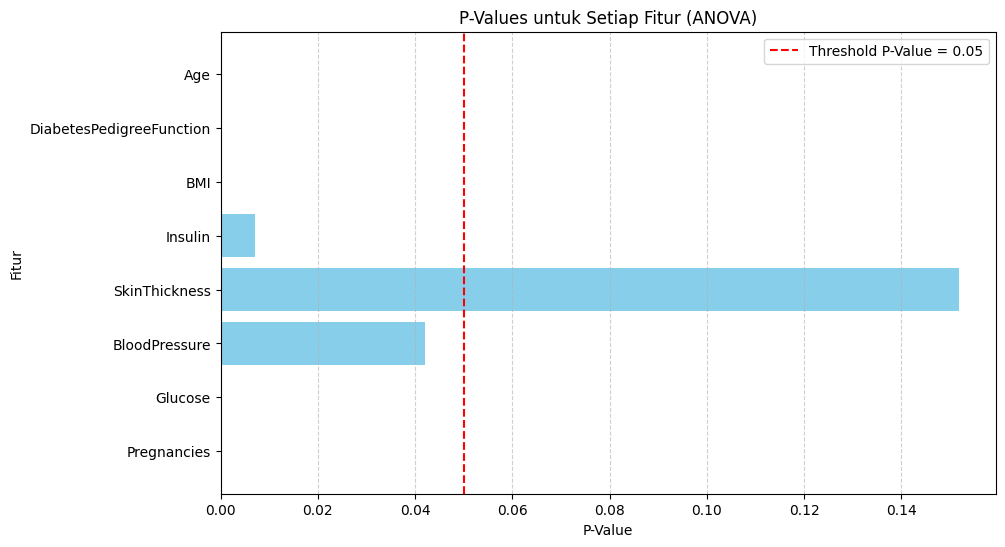

In [25]:
import matplotlib.pyplot as plt

# Membuat plot untuk P-Values
plt.figure(figsize=(10, 6))

# Membuat bar chart untuk P-Values
plt.barh(X_train.columns, p_values, color='skyblue')
plt.axvline(x=0.05, color='r', linestyle='--', label='Threshold P-Value = 0.05')  # Menambahkan threshold P-Value
plt.title('P-Values untuk Setiap Fitur (ANOVA)')
plt.xlabel('P-Value')
plt.ylabel('Fitur')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Menampilkan chart
plt.show()


# Hitung Specificity

In [26]:
from sklearn.metrics import confusion_matrix

# Menyimpan nilai Specificity untuk setiap model KNN
specificities = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    
    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Menghitung Specificity
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Menampilkan Specificity untuk setiap nilai k
print("Specificity untuk setiap nilai k:")
for k, specificity in zip(k_values, specificities):
    print(f"k = {k}: Specificity = {specificity:.4f}")


Specificity untuk setiap nilai k:
k = 1: Specificity = 0.7374
k = 3: Specificity = 0.7980
k = 5: Specificity = 0.7879
k = 7: Specificity = 0.7879
k = 9: Specificity = 0.7778
k = 11: Specificity = 0.8081
k = 13: Specificity = 0.8384
k = 15: Specificity = 0.8182
k = 17: Specificity = 0.8384
k = 19: Specificity = 0.8485


# Visualisasi Specificity Setiap Nilai K

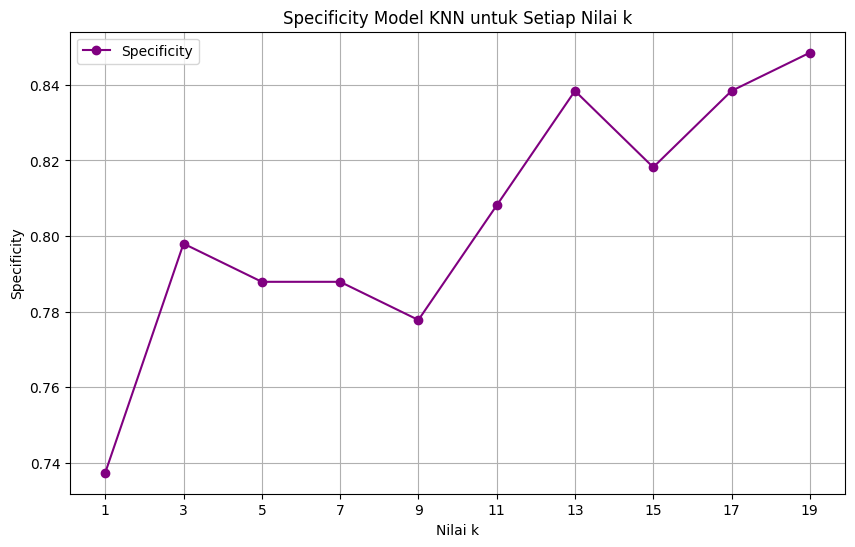

In [27]:
import matplotlib.pyplot as plt

# Membuat plot untuk Specificity terhadap nilai k
plt.figure(figsize=(10, 6))

# Plot Specificity
plt.plot(k_values, specificities, marker='o', linestyle='-', color='purple', label='Specificity')

# Menambahkan judul dan label
plt.title('Specificity Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Specificity')
plt.xticks(k_values)
plt.grid(True)

# Menambahkan legend
plt.legend()

# Menampilkan chart
plt.show()
